# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score

from sklearn.model_selection import GroupKFold
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, make_scorer

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# READ DATA FILE

In [3]:
df_z_text = pd.read_csv('z_text.csv')
df_z_text

,Participant,Paragraph,ParaText,Probe,wordCount_with_stopwords,syllableCount_with_stopwords,ease_of_reading,wordCount_without_stopwords,syllableCount_without_stopwords,sentiment,...,PP_2_cluster_avg_duration_z,PP_2_cluster_sd_duration_z,PP_2_cluster_skew_duration,PP_2_dispersion_z,PP_3_cluster_num_clusters_z,PP_3_cluster_avg_duration_z,PP_3_cluster_sd_duration_z,PP_3_cluster_skew_duration_z,PP_3_dispersion_z,TUT
0,593890eac6aa16000101f037,4,discovered story claude hopkins years ago repo...,Y,81,131,50.87,50,100,1,...,-0.033126,-0.213779,-0.903516,-0.924749,0.370328,-0.066318,-0.153283,-0.684417,-0.963887,1
1,596e1af7a09655000197d4bb,4,discovered story claude hopkins years ago repo...,Y,81,131,50.87,50,100,1,...,0.155430,-0.075266,-0.897869,0.355099,1.510277,0.053859,-0.117215,0.439471,-0.829032,0
2,5af835d8e19f8c00019e6dc0,4,discovered story claude hopkins years ago repo...,Y,81,131,50.87,50,100,1,...,-2.228014,0.758169,0.138817,0.175464,2.419457,-1.698064,1.274402,-0.031478,-1.330783,0
3,5b07b71c68eff50001d1c859,4,discovered story claude hopkins years ago repo...,Y,81,131,50.87,50,100,1,...,0.363411,-0.649431,0.430750,0.172749,1.778610,-0.026483,-0.295038,-1.090829,-1.300252,0
4,5bd7971b0aac450001f951aa,4,discovered story claude hopkins years ago repo...,Y,81,131,50.87,50,100,1,...,0.193624,0.239427,-0.901496,-0.287415,1.839684,0.607961,-0.570101,1.562368,-0.520964,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,614f324e8b434b2a9c0c93c1,36,soon companies discovered hopkins really selli...,Y,55,90,57.47,36,69,1,...,0.312454,0.790132,0.311001,-0.388126,-0.116622,0.389222,0.341086,-0.015498,0.197758,0
1946,6295270587394aac7ce600db,36,soon companies discovered hopkins really selli...,Y,55,90,57.47,36,69,1,...,4.864667,5.479063,1.804449,0.071194,-0.486558,-0.114336,-0.285320,-1.096341,0.057773,0
1947,63d17cf704d2d7053d56b962,36,soon companies discovered hopkins really selli...,Y,55,90,57.47,36,69,1,...,0.952040,0.320602,0.171530,0.226536,0.932502,-0.010933,-0.105516,0.255756,-0.285476,1
1948,63d3fa78d12b38b131ef6b76,36,soon companies discovered hopkins really selli...,Y,55,90,57.47,36,69,1,...,-0.981757,-0.738125,-1.851863,0.578099,0.312767,0.286756,0.317529,0.645295,0.188702,1


# STANDADIZE NLP COLUMNS

In [4]:
df_z_text_standardize = df_z_text.select_dtypes(include=[np.number])


In [5]:
columns_to_zscore = [
    'wordCount_with_stopwords', 'syllableCount_with_stopwords', 'ease_of_reading',
    'wordCount_without_stopwords', 'syllableCount_without_stopwords', 'sentiment',
    'PP_CD', 'PP_NN', 'PP_JJ', 'PP_VBN', 'PP_VBP', 'PP_NNS', 'PP_VBD', 'PP_VBG',
    'PP_DT', 'PP_IN', 'PP_JJS', 'PP_MD', 'PP_VB', 'PP_RB', 'PP_VBZ', 'PP_RBS',
    'PP_JJR', 'PP_WRB', 'PP_RBR', 'PP_2_CD', 'PP_2_NN', 'PP_2_JJ', 'PP_2_VBN',
    'PP_2_VBP', 'PP_2_NNS', 'PP_2_VBD', 'PP_2_VBG', 'PP_2_DT', 'PP_2_IN',
    'PP_2_JJS', 'PP_2_MD', 'PP_2_VB', 'PP_2_RB', 'PP_2_VBZ', 'PP_2_RBS',
    'PP_2_JJR', 'PP_2_WRB', 'PP_2_RBR', 'PP_3_CD', 'PP_3_NN', 'PP_3_JJ',
    'PP_3_VBN', 'PP_3_VBP', 'PP_3_NNS', 'PP_3_VBD', 'PP_3_VBG', 'PP_3_DT',
    'PP_3_IN', 'PP_3_JJS', 'PP_3_MD', 'PP_3_VB', 'PP_3_RB', 'PP_3_VBZ',
    'PP_3_RBS', 'PP_3_JJR', 'PP_3_WRB', 'PP_3_RBR']

scaler = StandardScaler()
df_z_text_standardize[columns_to_zscore] = scaler.fit_transform(df_z_text_standardize[columns_to_zscore])
df_z_text_standardize

,Paragraph,wordCount_with_stopwords,syllableCount_with_stopwords,ease_of_reading,wordCount_without_stopwords,syllableCount_without_stopwords,sentiment,PP_CD,PP_NN,PP_JJ,...,PP_2_cluster_avg_duration_z,PP_2_cluster_sd_duration_z,PP_2_cluster_skew_duration,PP_2_dispersion_z,PP_3_cluster_num_clusters_z,PP_3_cluster_avg_duration_z,PP_3_cluster_sd_duration_z,PP_3_cluster_skew_duration_z,PP_3_dispersion_z,TUT
0,4,1.152847,1.322515,-0.935244,1.346205,1.502569,0.40519,-0.579958,0.809458,1.073888,...,-0.033126,-0.213779,-0.903516,-0.924749,0.370328,-0.066318,-0.153283,-0.684417,-0.963887,1
1,4,1.152847,1.322515,-0.935244,1.346205,1.502569,0.40519,-0.579958,0.809458,1.073888,...,0.155430,-0.075266,-0.897869,0.355099,1.510277,0.053859,-0.117215,0.439471,-0.829032,0
2,4,1.152847,1.322515,-0.935244,1.346205,1.502569,0.40519,-0.579958,0.809458,1.073888,...,-2.228014,0.758169,0.138817,0.175464,2.419457,-1.698064,1.274402,-0.031478,-1.330783,0
3,4,1.152847,1.322515,-0.935244,1.346205,1.502569,0.40519,-0.579958,0.809458,1.073888,...,0.363411,-0.649431,0.430750,0.172749,1.778610,-0.026483,-0.295038,-1.090829,-1.300252,0
4,4,1.152847,1.322515,-0.935244,1.346205,1.502569,0.40519,-0.579958,0.809458,1.073888,...,0.193624,0.239427,-0.901496,-0.287415,1.839684,0.607961,-0.570101,1.562368,-0.520964,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,36,-0.044223,0.110735,-0.187969,0.296525,0.306552,0.40519,-0.579958,-0.884605,-0.669001,...,0.312454,0.790132,0.311001,-0.388126,-0.116622,0.389222,0.341086,-0.015498,0.197758,0
1946,36,-0.044223,0.110735,-0.187969,0.296525,0.306552,0.40519,-0.579958,-0.884605,-0.669001,...,4.864667,5.479063,1.804449,0.071194,-0.486558,-0.114336,-0.285320,-1.096341,0.057773,0
1947,36,-0.044223,0.110735,-0.187969,0.296525,0.306552,0.40519,-0.579958,-0.884605,-0.669001,...,0.952040,0.320602,0.171530,0.226536,0.932502,-0.010933,-0.105516,0.255756,-0.285476,1
1948,36,-0.044223,0.110735,-0.187969,0.296525,0.306552,0.40519,-0.579958,-0.884605,-0.669001,...,-0.981757,-0.738125,-1.851863,0.578099,0.312767,0.286756,0.317529,0.645295,0.188702,1


In [6]:
finalDf = pd.merge(df_z_text[['Participant']], df_z_text_standardize, left_index=True, right_index=True, how='left')
finalDf

,Participant,Paragraph,wordCount_with_stopwords,syllableCount_with_stopwords,ease_of_reading,wordCount_without_stopwords,syllableCount_without_stopwords,sentiment,PP_CD,PP_NN,...,PP_2_cluster_avg_duration_z,PP_2_cluster_sd_duration_z,PP_2_cluster_skew_duration,PP_2_dispersion_z,PP_3_cluster_num_clusters_z,PP_3_cluster_avg_duration_z,PP_3_cluster_sd_duration_z,PP_3_cluster_skew_duration_z,PP_3_dispersion_z,TUT
0,593890eac6aa16000101f037,4,1.152847,1.322515,-0.935244,1.346205,1.502569,0.40519,-0.579958,0.809458,...,-0.033126,-0.213779,-0.903516,-0.924749,0.370328,-0.066318,-0.153283,-0.684417,-0.963887,1
1,596e1af7a09655000197d4bb,4,1.152847,1.322515,-0.935244,1.346205,1.502569,0.40519,-0.579958,0.809458,...,0.155430,-0.075266,-0.897869,0.355099,1.510277,0.053859,-0.117215,0.439471,-0.829032,0
2,5af835d8e19f8c00019e6dc0,4,1.152847,1.322515,-0.935244,1.346205,1.502569,0.40519,-0.579958,0.809458,...,-2.228014,0.758169,0.138817,0.175464,2.419457,-1.698064,1.274402,-0.031478,-1.330783,0
3,5b07b71c68eff50001d1c859,4,1.152847,1.322515,-0.935244,1.346205,1.502569,0.40519,-0.579958,0.809458,...,0.363411,-0.649431,0.430750,0.172749,1.778610,-0.026483,-0.295038,-1.090829,-1.300252,0
4,5bd7971b0aac450001f951aa,4,1.152847,1.322515,-0.935244,1.346205,1.502569,0.40519,-0.579958,0.809458,...,0.193624,0.239427,-0.901496,-0.287415,1.839684,0.607961,-0.570101,1.562368,-0.520964,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,614f324e8b434b2a9c0c93c1,36,-0.044223,0.110735,-0.187969,0.296525,0.306552,0.40519,-0.579958,-0.884605,...,0.312454,0.790132,0.311001,-0.388126,-0.116622,0.389222,0.341086,-0.015498,0.197758,0
1946,6295270587394aac7ce600db,36,-0.044223,0.110735,-0.187969,0.296525,0.306552,0.40519,-0.579958,-0.884605,...,4.864667,5.479063,1.804449,0.071194,-0.486558,-0.114336,-0.285320,-1.096341,0.057773,0
1947,63d17cf704d2d7053d56b962,36,-0.044223,0.110735,-0.187969,0.296525,0.306552,0.40519,-0.579958,-0.884605,...,0.952040,0.320602,0.171530,0.226536,0.932502,-0.010933,-0.105516,0.255756,-0.285476,1
1948,63d3fa78d12b38b131ef6b76,36,-0.044223,0.110735,-0.187969,0.296525,0.306552,0.40519,-0.579958,-0.884605,...,-0.981757,-0.738125,-1.851863,0.578099,0.312767,0.286756,0.317529,0.645295,0.188702,1


In [14]:
# finalDf.to_csv('NLP__gazes_fixation_z.csv', index=False)

In [3]:
finalDf = pd.read_csv('NLP__gazes_fixation_z.csv')


In [17]:
finalDf_copy = finalDf.copy()

In [18]:
# Drop the 'Paragraph' and 'Participant' columns from the copied dataframe
finalDf_copy = finalDf_copy.drop(['Paragraph', 'Participant'], axis=1)

# Compute the correlation matrix
correlation_matrix = finalDf_copy.corr()
correlation_matrix

,wordCount_with_stopwords,syllableCount_with_stopwords,ease_of_reading,wordCount_without_stopwords,syllableCount_without_stopwords,sentiment,PP_CD,PP_NN,PP_JJ,PP_VBN,...,PP_2_cluster_avg_duration_z,PP_2_cluster_sd_duration_z,PP_2_cluster_skew_duration,PP_2_dispersion_z,PP_3_cluster_num_clusters_z,PP_3_cluster_avg_duration_z,PP_3_cluster_sd_duration_z,PP_3_cluster_skew_duration_z,PP_3_dispersion_z,TUT
wordCount_with_stopwords,1.000000,0.987558,-0.590798,0.971111,0.942205,0.372372,-0.137340,0.853211,0.943432,0.382094,...,-0.101173,0.073694,-0.012616,0.158753,0.144575,0.184466,-0.035809,0.055698,-0.197085,0.081538
syllableCount_with_stopwords,0.987558,1.000000,-0.673005,0.989506,0.981374,0.422181,-0.226130,0.832951,0.896467,0.462159,...,-0.065504,0.054556,-0.004287,0.124380,0.182885,0.208092,-0.040996,0.057198,-0.212741,0.075022
ease_of_reading,-0.590798,-0.673005,1.000000,-0.613648,-0.696023,-0.504641,0.341768,-0.651926,-0.381507,-0.274210,...,-0.042653,0.028815,-0.015961,-0.018253,-0.143701,-0.180121,0.027027,-0.040815,0.145095,-0.069145
wordCount_without_stopwords,0.971111,0.989506,-0.613648,1.000000,0.988904,0.426691,-0.281424,0.780175,0.879906,0.496702,...,-0.048954,0.048364,-0.002410,0.106261,0.203861,0.218557,-0.047424,0.059411,-0.222807,0.063841
syllableCount_without_stopwords,0.942205,0.981374,-0.696023,0.988904,1.000000,0.469831,-0.348309,0.771366,0.827493,0.553148,...,-0.016735,0.030198,0.006047,0.074420,0.226319,0.228887,-0.047379,0.057105,-0.225724,0.060281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_3_cluster_avg_duration_z,0.184466,0.208092,-0.180121,0.218557,0.228887,-0.111838,0.050318,0.108958,0.153553,0.234003,...,0.168361,0.044681,-0.111195,0.015493,0.359555,1.000000,0.246264,0.029266,-0.270666,0.018417
PP_3_cluster_sd_duration_z,-0.035809,-0.040996,0.027027,-0.047424,-0.047379,0.099898,-0.057878,-0.012795,-0.037841,-0.065504,...,0.026229,0.029741,-0.032393,0.017210,-0.215926,0.246264,1.000000,0.145656,0.132841,-0.019760
PP_3_cluster_skew_duration_z,0.055698,0.057198,-0.040815,0.059411,0.057105,-0.075322,0.055582,0.039341,0.056585,0.042906,...,-0.051566,-0.017325,-0.011689,-0.039736,0.166410,0.029266,0.145656,1.000000,-0.084213,0.001763
PP_3_dispersion_z,-0.197085,-0.212741,0.145095,-0.222807,-0.225724,0.186312,-0.121966,-0.109251,-0.183956,-0.252007,...,-0.052493,0.012380,-0.029099,0.071520,-0.503829,-0.270666,0.132841,-0.084213,1.000000,-0.024703


# TESTING TO IMPROVE MODEL

# RUN MODELS

## GROUP K FOLD AND SMOTE

Majority class 0
Minority class 1
Dummy Classifier Results:
Avg Accuracy: 0.58
Avg Weighted F1 Score: 0.58
Avg Precision_1: 0.35
Avg Recall_1: 0.35
Avg AUROC: 0.50
Avg Confusion Matrix:
[[180.8  82.6]
 [ 82.6  44. ]]
Avg Prediction Rate: 0.32

Random Forest Results:
Avg Accuracy: 0.55
Avg Weighted F1 Score: 0.56
Avg Precision_1: 0.36
Avg Recall_1: 0.52
Avg AUROC: 0.56
Avg Confusion Matrix:
[[147.4 116. ]
 [ 60.6  66. ]]
Avg Prediction Rate: 0.47

SVM Results:
Avg Accuracy: 0.55
Avg Weighted F1 Score: 0.56
Avg Precision_1: 0.36
Avg Recall_1: 0.52
Avg AUROC: 0.54
Avg Confusion Matrix:
[[147.  116.4]
 [ 60.6  66. ]]
Avg Prediction Rate: 0.47



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


XGBoost Results:
Avg Accuracy: 0.53
Avg Weighted F1 Score: 0.54
Avg Precision_1: 0.36
Avg Recall_1: 0.59
Avg AUROC: 0.56
Avg Confusion Matrix:
[[131.8 131.6]
 [ 51.8  74.8]]
Avg Prediction Rate: 0.53



<Figure size 1000x600 with 0 Axes>

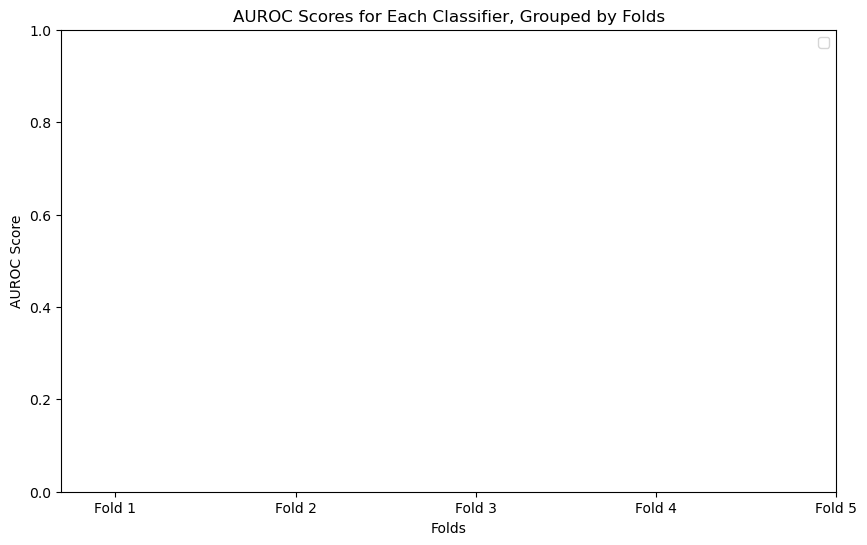

In [49]:
from sklearn.model_selection import GroupKFold
# Preparing the data
X = finalDf[['wordCount_with_stopwords', 'syllableCount_with_stopwords', 'ease_of_reading',
    'wordCount_without_stopwords', 'syllableCount_without_stopwords', 'sentiment',
    'PP_CD', 'PP_NN', 'PP_JJ', 'PP_VBN', 'PP_VBP', 'PP_NNS', 'PP_VBD', 'PP_VBG',
    'PP_DT', 'PP_IN', 'PP_JJS', 'PP_MD', 'PP_VB', 'PP_RB', 'PP_VBZ', 'PP_RBS',
    'PP_JJR', 'PP_WRB', 'PP_RBR', 'PP_2_CD', 'PP_2_NN', 'PP_2_JJ', 'PP_2_VBN',
    'PP_2_VBP', 'PP_2_NNS', 'PP_2_VBD', 'PP_2_VBG', 'PP_2_DT', 'PP_2_IN',
    'PP_2_JJS', 'PP_2_MD', 'PP_2_VB', 'PP_2_RB', 'PP_2_VBZ', 'PP_2_RBS',
    'PP_2_JJR', 'PP_2_WRB', 'PP_2_RBR', 'PP_3_CD', 'PP_3_NN', 'PP_3_JJ',
    'PP_3_VBN', 'PP_3_VBP', 'PP_3_NNS', 'PP_3_VBD', 'PP_3_VBG', 'PP_3_DT',
    'PP_3_IN', 'PP_3_JJS', 'PP_3_MD', 'PP_3_VB', 'PP_3_RB', 'PP_3_VBZ',
    'PP_3_RBS', 'PP_3_JJR', 'PP_3_WRB', 'PP_3_RBR'
]]
y = finalDf['TUT']

# Identify majority and minority classes
majority_class = finalDf['TUT'].value_counts().idxmax()
minority_class = finalDf['TUT'].value_counts().idxmin()
print("Majority class", majority_class)
print("Minority class", minority_class)

# Separate majority and minority class samples
majority_indices = finalDf[finalDf['TUT'] == majority_class].index
minority_indices = finalDf[finalDf['TUT'] == minority_class].index

plt.figure(figsize=(10, 6)) 

classifiers = {
    'Dummy Classifier': DummyClassifier(strategy="stratified"),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(random_state=42, probability=True), 
    "XGBoost": xgb.XGBClassifier(random_state=42)
}

auroc_score_barplot = {name: [] for name in classifiers}

# Define the number of folds for cross-validation
n_splits = 5

# Define the GroupKFold object
gkf = GroupKFold(n_splits=n_splits)

# Loop through the classifiers
for name, clf in classifiers.items():
    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    weighted_f1_scores = []
    precision_scores = []
    recall_scores = []
    auroc_scores = []
    confusion_matrices = []
    prediction_rates = []

    # Perform cross-validation
    for train_index, test_index in gkf.split(X, y, groups=finalDf['Participant']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Perform oversampling on minority class
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        if (name == "Dummy Classifier"):
            clf.fit(X_train, y_train) 
 
        else:
            clf.fit(X_train_resampled, y_train_resampled) 

        y_pred = clf.predict(X_test)  

        # Calculating predicted probabilities for AUROC;
        y_pred_proba = clf.predict_proba(X_test)[:, 1]

        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        auroc = roc_auc_score(y_test, y_pred_proba) 
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

        # Append evaluation metrics to lists
        accuracy_scores.append(accuracy)
        weighted_f1_scores.append(weighted_f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auroc_scores.append(auroc)
        confusion_matrices.append(confusion_matrix)
        prediction_rates.append(prediction_rate)

    # Calculate average evaluation metrics across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_weighted_f1 = np.mean(weighted_f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_auroc = np.mean(auroc_scores)
    avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
    avg_prediction_rate = np.mean(prediction_rates)

    # Output the average evaluation metrics for each classifier
    print(f"{name} Results:")
    print(f"Avg Accuracy: {avg_accuracy:.2f}")
    print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
    print(f"Avg Precision_1: {avg_precision:.2f}")
    print(f"Avg Recall_1: {avg_recall:.2f}")
    print(f"Avg AUROC: {avg_auroc:.2f}")
    print("Avg Confusion Matrix:")
    print(avg_confusion_matrix)
    print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")


## PRINCIPAL COMPONENT ANALYSIS 

Majority class 0
Minority class 1
Dummy Classifier Results:
Avg Accuracy: 0.58
Avg Weighted F1 Score: 0.58
Avg Precision_1: 0.35
Avg Recall_1: 0.35
Avg AUROC: 0.50
Avg Confusion Matrix:
[[180.8  82.6]
 [ 82.4  44.2]]
Avg Prediction Rate: 0.33

Random Forest Results:
Avg Accuracy: 0.53
Avg Weighted F1 Score: 0.54
Avg Precision_1: 0.36
Avg Recall_1: 0.59
Avg AUROC: 0.56
Avg Confusion Matrix:
[[132.4 131. ]
 [ 52.   74.6]]
Avg Prediction Rate: 0.53

SVM Results:
Avg Accuracy: 0.53
Avg Weighted F1 Score: 0.54
Avg Precision_1: 0.36
Avg Recall_1: 0.59
Avg AUROC: 0.55
Avg Confusion Matrix:
[[132.4 131. ]
 [ 52.   74.6]]
Avg Prediction Rate: 0.53

XGBoost Results:
Avg Accuracy: 0.53
Avg Weighted F1 Score: 0.55
Avg Precision_1: 0.37
Avg Recall_1: 0.60
Avg AUROC: 0.57
Avg Confusion Matrix:
[[133.  130.4]
 [ 51.4  75.2]]
Avg Prediction Rate: 0.53



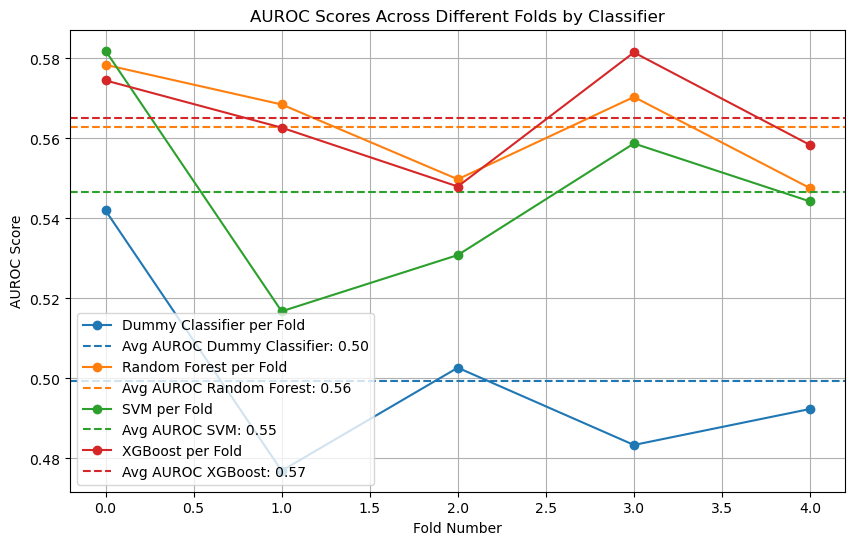

In [4]:
from sklearn.model_selection import GroupKFold
from collections import Counter

# Preparing the data
X = finalDf[['wordCount_with_stopwords', 'syllableCount_with_stopwords', 'ease_of_reading',
    'wordCount_without_stopwords', 'syllableCount_without_stopwords', 'sentiment',
    'PP_CD', 'PP_NN', 'PP_JJ', 'PP_VBN', 'PP_VBP', 'PP_NNS', 'PP_VBD', 'PP_VBG',
    'PP_DT', 'PP_IN', 'PP_JJS', 'PP_MD', 'PP_VB', 'PP_RB', 'PP_VBZ', 'PP_RBS',
    'PP_JJR', 'PP_WRB', 'PP_RBR', 'PP_2_CD', 'PP_2_NN', 'PP_2_JJ', 'PP_2_VBN',
    'PP_2_VBP', 'PP_2_NNS', 'PP_2_VBD', 'PP_2_VBG', 'PP_2_DT', 'PP_2_IN',
    'PP_2_JJS', 'PP_2_MD', 'PP_2_VB', 'PP_2_RB', 'PP_2_VBZ', 'PP_2_RBS',
    'PP_2_JJR', 'PP_2_WRB', 'PP_2_RBR', 'PP_3_CD', 'PP_3_NN', 'PP_3_JJ',
    'PP_3_VBN', 'PP_3_VBP', 'PP_3_NNS', 'PP_3_VBD', 'PP_3_VBG', 'PP_3_DT',
    'PP_3_IN', 'PP_3_JJS', 'PP_3_MD', 'PP_3_VB', 'PP_3_RB', 'PP_3_VBZ',
    'PP_3_RBS', 'PP_3_JJR', 'PP_3_WRB', 'PP_3_RBR'
]]
y = finalDf['TUT']

# Identify majority and minority classes
majority_class = finalDf['TUT'].value_counts().idxmax()
minority_class = finalDf['TUT'].value_counts().idxmin()
print("Majority class", majority_class)
print("Minority class", minority_class)

# Separate majority and minority class samples
majority_indices = finalDf[finalDf['TUT'] == majority_class].index
minority_indices = finalDf[finalDf['TUT'] == minority_class].index

plt.figure(figsize=(10, 6)) 

classifiers = {
    'Dummy Classifier': DummyClassifier(strategy="stratified"),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(random_state=42, probability=True),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}

# Define the number of folds for cross-validation
n_splits = 5

# Define the GroupKFold object
gkf = GroupKFold(n_splits=n_splits)

# Loop through the classifiers
for name, clf in classifiers.items():
    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    weighted_f1_scores = []
    precision_scores = []
    recall_scores = []
    auroc_scores = []
    confusion_matrices = []
    prediction_rates = []

    # Perform cross-validation
    for train_index, test_index in gkf.split(X, y, groups=finalDf['Participant']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply PCA on the training data
        pca = PCA(n_components=0.95)
        X_train_pca = pca.fit_transform(X_train)
        X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

        # Perform oversampling on minority class
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

#         print(f"Before SMOTE: {Counter(y_train)}")
#         print(f"After SMOTE: {Counter(y_train_resampled)}")


        # Apply the transformation to the test data
        X_test_pca = pca.transform(X_test)
        X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

        
        if (name == "Dummy Classifier"):
            clf.fit(X_train, y_train) 
            y_pred = clf.predict(X_test)  

            # Calculating predicted probabilities for AUROC;
            y_pred_proba = clf.predict_proba(X_test)[:, 1]

        else:
            clf.fit(X_train_resampled, y_train_resampled)  
            y_pred = clf.predict(X_test_pca_df)  

            # Calculating predicted probabilities for AUROC;
            y_pred_proba = clf.predict_proba(X_test_pca_df)[:, 1]
             

        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        auroc = roc_auc_score(y_test, y_pred_proba) 
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

        # Append evaluation metrics to lists
        accuracy_scores.append(accuracy)
        weighted_f1_scores.append(weighted_f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auroc_scores.append(auroc)
        confusion_matrices.append(confusion_matrix)
        prediction_rates.append(prediction_rate)

    # Calculate average evaluation metrics across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_weighted_f1 = np.mean(weighted_f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_auroc = np.mean(auroc_scores)
    avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
    avg_prediction_rate = np.mean(prediction_rates)

    # Output the average evaluation metrics for each classifier
    print(f"{name} Results:")
    print(f"Avg Accuracy: {avg_accuracy:.2f}")
    print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
    print(f"Avg Precision_1: {avg_precision:.2f}")
    print(f"Avg Recall_1: {avg_recall:.2f}")
    print(f"Avg AUROC: {avg_auroc:.2f}")
    print("Avg Confusion Matrix:")
    print(avg_confusion_matrix)
    print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")



## HYPERPARAMETER TUNING

Majority class 0
Minority class 1
Chance Results:
Avg Accuracy: 0.57
Avg Weighted F1 Score: 0.57
Avg Precision_1: 0.33
Avg Recall_1: 0.32
Avg AUROC: 0.49
Avg Confusion Matrix:
[[181.6  81.8]
 [ 86.6  40. ]]
Avg Prediction Rate: 0.31

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.55
Avg Weighted F1 Score: 0.56
Avg Precision_1: 0.36
Avg Recall_1: 0.52
Avg AUROC: 0.57
Avg Confusion Matrix:
[[147.4 116. ]
 [ 60.2  66.4]]
Avg Prediction Rate: 0.47

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5

<Figure size 1100x700 with 0 Axes>

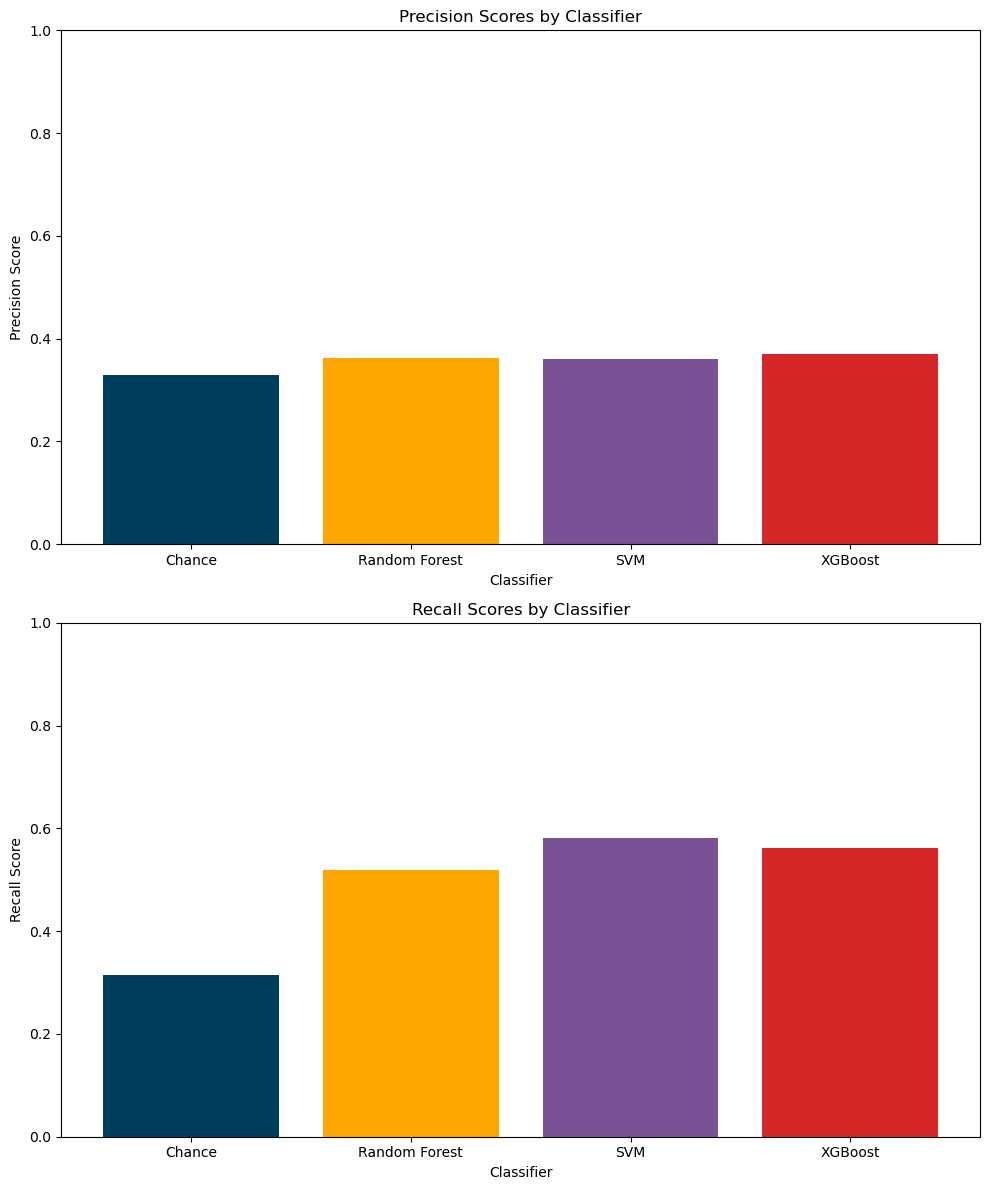

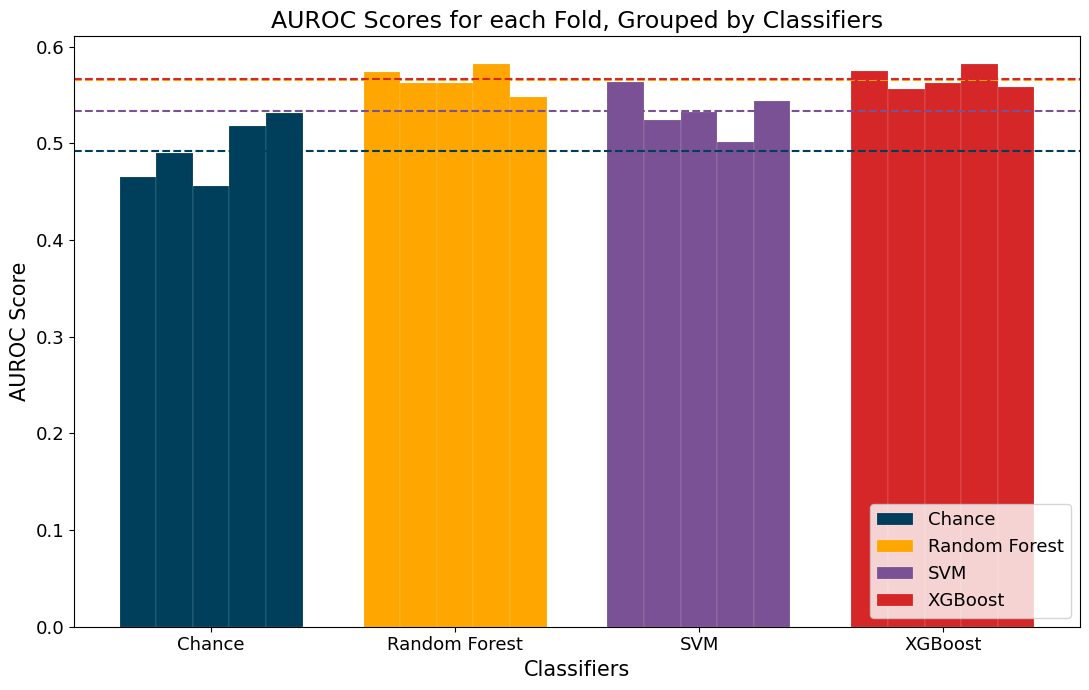

In [5]:
#PRECISION
# Preparing the data
X = finalDf[['wordCount_with_stopwords', 'syllableCount_with_stopwords', 'ease_of_reading',
    'wordCount_without_stopwords', 'syllableCount_without_stopwords', 'sentiment',
    'PP_CD', 'PP_NN', 'PP_JJ', 'PP_VBN', 'PP_VBP', 'PP_NNS', 'PP_VBD', 'PP_VBG',
    'PP_DT', 'PP_IN', 'PP_JJS', 'PP_MD', 'PP_VB', 'PP_RB', 'PP_VBZ', 'PP_RBS',
    'PP_JJR', 'PP_WRB', 'PP_RBR', 'PP_2_CD', 'PP_2_NN', 'PP_2_JJ', 'PP_2_VBN',
    'PP_2_VBP', 'PP_2_NNS', 'PP_2_VBD', 'PP_2_VBG', 'PP_2_DT', 'PP_2_IN',
    'PP_2_JJS', 'PP_2_MD', 'PP_2_VB', 'PP_2_RB', 'PP_2_VBZ', 'PP_2_RBS',
    'PP_2_JJR', 'PP_2_WRB', 'PP_2_RBR', 'PP_3_CD', 'PP_3_NN', 'PP_3_JJ',
    'PP_3_VBN', 'PP_3_VBP', 'PP_3_NNS', 'PP_3_VBD', 'PP_3_VBG', 'PP_3_DT',
    'PP_3_IN', 'PP_3_JJS', 'PP_3_MD', 'PP_3_VB', 'PP_3_RB', 'PP_3_VBZ',
    'PP_3_RBS', 'PP_3_JJR', 'PP_3_WRB', 'PP_3_RBR'
]]
y = finalDf['TUT']

# Identify majority and minority classes
majority_class = finalDf['TUT'].value_counts().idxmax()
minority_class = finalDf['TUT'].value_counts().idxmin()
print("Majority class", majority_class)
print("Minority class", minority_class)

# Separate majority and minority class samples
majority_indices = finalDf[finalDf['TUT'] == majority_class].index
minority_indices = finalDf[finalDf['TUT'] == minority_class].index

precision_scorer = make_scorer(precision_score)

plt.figure(figsize=(11, 7)) 

precision_dict = {}
recall_dict = {}

# List of classifiers
classifiers = {
    'Chance': DummyClassifier(strategy="stratified"),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(random_state=42, probability=True), 
    "XGBoost": xgb.XGBClassifier(random_state=42)
}
auroc_score_barplot = {name: [] for name in classifiers}

# Parameters for tuning classifiers
param_grid_RF = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200],
    }

param_grid_SVM = {
    'C': [0.1, 1, 10],
#     'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']
}
    

param_grid_XGB = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 20],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
}

param_grids = {
    'Random Forest': param_grid_RF,
    'SVM': param_grid_SVM,
    'XGBoost': param_grid_XGB
}

# Define the number of folds for cross-validation
n_splits = 5

# Define the GroupKFold object
gkf = GroupKFold(n_splits=n_splits)

# Loop through the classifiers
for name, clf in classifiers.items():
    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    weighted_f1_scores = []
    precision_scores = []
    recall_scores = []
    auroc_scores = []
    confusion_matrices = []
    prediction_rates = []

    # Perform cross-validation
    for train_index, test_index in gkf.split(X, y, groups=finalDf['Participant']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply PCA on the training data
        pca = PCA(n_components=0.95)
        X_train_pca = pca.fit_transform(X_train)
        X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

        
        # Perform oversampling on minority class
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

        
#         print(f"Before SMOTE: {Counter(y_train)}")
#         print(f"After SMOTE: {Counter(y_train_resampled)}")

        # Apply the transformation to the test data
        X_test_pca = pca.transform(X_test)
        X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

        
        # Perform hyperparamenter tuning and train classifiers on best parameters
        if name != "Chance":
            grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring=precision_scorer, n_jobs=-1)
            grid.fit(X_train_resampled, y_train_resampled)
            best_clf = grid.best_estimator_
            best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test_pca_df)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1] 

        else:
            best_clf = clf.fit(X_train, y_train)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test)[:, 1] 


        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        auroc = roc_auc_score(y_test, y_pred_proba) 
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

        
        # Append evaluation metrics to lists
        accuracy_scores.append(accuracy)
        weighted_f1_scores.append(weighted_f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auroc_scores.append(auroc)
        confusion_matrices.append(confusion_matrix)
        prediction_rates.append(prediction_rate)

        #barplot for AUROC
        auroc_score_barplot[name].append(auroc)
        
    
    # Calculate average evaluation metrics across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_weighted_f1 = np.mean(weighted_f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_auroc = np.mean(auroc_scores)
    avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
    avg_prediction_rate = np.mean(prediction_rates)

    
    # Output the average evaluation metrics for each classifier
    print(f"{name} Results:")
    print(f"Avg Accuracy: {avg_accuracy:.2f}")
    print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
    print(f"Avg Precision_1: {avg_precision:.2f}")
    print(f"Avg Recall_1: {avg_recall:.2f}")
    print(f"Avg AUROC: {avg_auroc:.2f}")
    print("Avg Confusion Matrix:")
    print(avg_confusion_matrix)
    print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

    # Store the average precision and recall for each classifier in a dictionary
    precision_dict[name] = avg_precision
    recall_dict[name] = avg_recall
    

# List of colors for each classifier
colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

# Plot bar charts for precision and recall
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Precision plot
ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
ax[0].set_title('Precision Scores by Classifier')
ax[0].set_xlabel('Classifier')
ax[0].set_ylabel('Precision Score')
ax[0].set_ylim([0, 1])

# Recall plot
ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
ax[1].set_title('Recall Scores by Classifier')
ax[1].set_xlabel('Classifier')
ax[1].set_ylabel('Recall Score')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()


# Plot bar chart for AUROC
fig, ax = plt.subplots(figsize=(11, 7))
bar_width = 0.15  
gap_width = 0.05 

bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

for idx, name in enumerate(classifiers):
    scores = auroc_score_barplot[name]
    avg_score = np.mean(scores)
    for fold_idx, score in enumerate(scores):
        bar_pos = bar_positions[idx] + (fold_idx * bar_width)
        ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
               color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
    ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
ax.set_xlabel('Classifiers', fontsize=15)
ax.set_ylabel('AUROC Score', fontsize=15)
ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers', fontsize=17)

ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
ax.set_xticklabels(classifiers.keys())

# Increasing the font size for tick labels and legend
ax.tick_params(axis='both', which='major', labelsize=13)


ax.legend(loc='lower right', fontsize=13)

plt.tight_layout()
plt.show()


Majority class 0
Minority class 1
Chance Results:
Avg Accuracy: 0.57
Avg Weighted F1 Score: 0.57
Avg Precision_1: 0.33
Avg Recall_1: 0.32
Avg AUROC: 0.50
Avg Confusion Matrix:
[[181.   82.4]
 [ 86.   40.6]]
Avg Prediction Rate: 0.32

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.56
Avg Weighted F1 Score: 0.57
Avg Precision_1: 0.37
Avg Recall_1: 0.50
Avg AUROC: 0.56
Avg Confusion Matrix:
[[156.2 107.2]
 [ 64.   62.6]]
Avg Prediction Rate: 0.44

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5

<Figure size 1100x700 with 0 Axes>

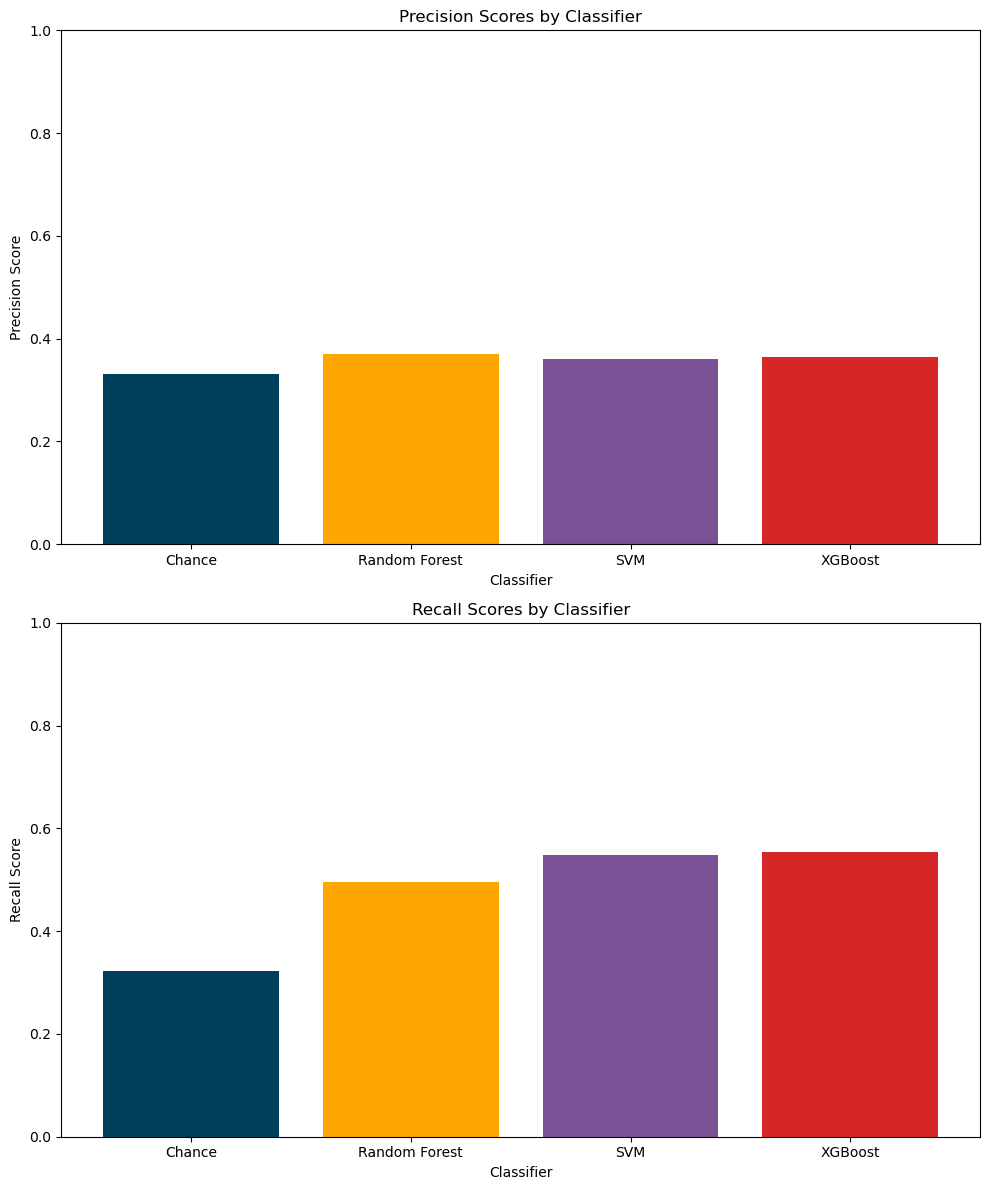

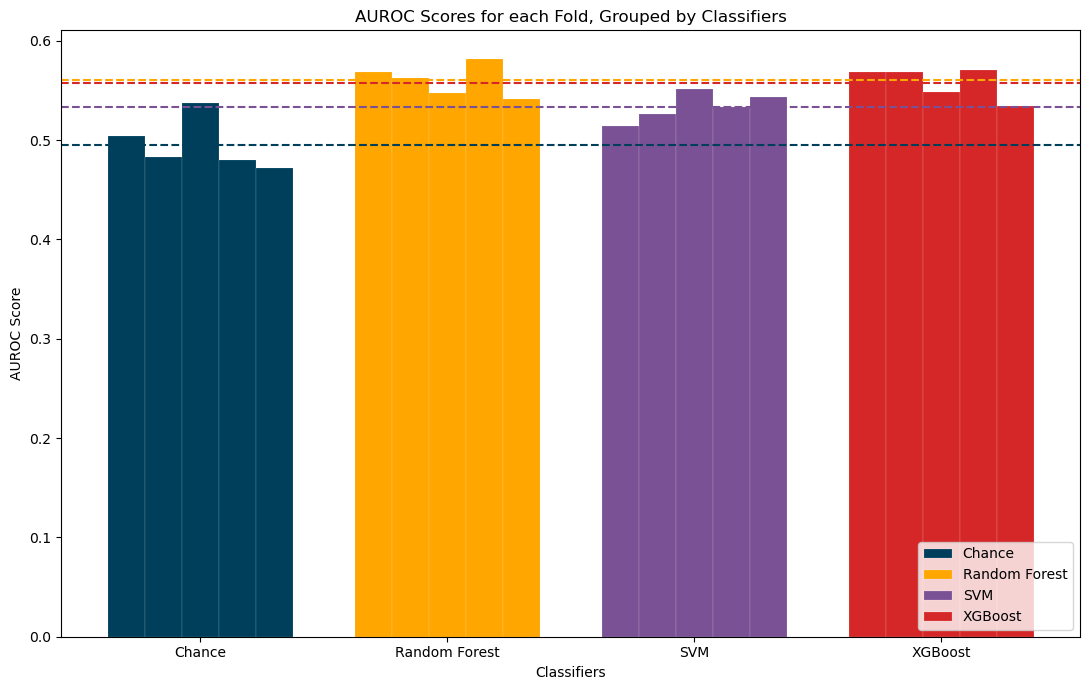

In [124]:
#RECALL
# Preparing the data
X = finalDf[['wordCount_with_stopwords', 'syllableCount_with_stopwords', 'ease_of_reading',
    'wordCount_without_stopwords', 'syllableCount_without_stopwords', 'sentiment',
    'PP_CD', 'PP_NN', 'PP_JJ', 'PP_VBN', 'PP_VBP', 'PP_NNS', 'PP_VBD', 'PP_VBG',
    'PP_DT', 'PP_IN', 'PP_JJS', 'PP_MD', 'PP_VB', 'PP_RB', 'PP_VBZ', 'PP_RBS',
    'PP_JJR', 'PP_WRB', 'PP_RBR', 'PP_2_CD', 'PP_2_NN', 'PP_2_JJ', 'PP_2_VBN',
    'PP_2_VBP', 'PP_2_NNS', 'PP_2_VBD', 'PP_2_VBG', 'PP_2_DT', 'PP_2_IN',
    'PP_2_JJS', 'PP_2_MD', 'PP_2_VB', 'PP_2_RB', 'PP_2_VBZ', 'PP_2_RBS',
    'PP_2_JJR', 'PP_2_WRB', 'PP_2_RBR', 'PP_3_CD', 'PP_3_NN', 'PP_3_JJ',
    'PP_3_VBN', 'PP_3_VBP', 'PP_3_NNS', 'PP_3_VBD', 'PP_3_VBG', 'PP_3_DT',
    'PP_3_IN', 'PP_3_JJS', 'PP_3_MD', 'PP_3_VB', 'PP_3_RB', 'PP_3_VBZ',
    'PP_3_RBS', 'PP_3_JJR', 'PP_3_WRB', 'PP_3_RBR'
]]
y = finalDf['TUT']

# Identify majority and minority classes
majority_class = finalDf['TUT'].value_counts().idxmax()
minority_class = finalDf['TUT'].value_counts().idxmin()
print("Majority class", majority_class)
print("Minority class", minority_class)

# Separate majority and minority class samples
majority_indices = finalDf[finalDf['TUT'] == majority_class].index
minority_indices = finalDf[finalDf['TUT'] == minority_class].index

recall_scorer = make_scorer(recall_score)

plt.figure(figsize=(11, 7)) 

precision_dict = {}
recall_dict = {}

# List of classifiers
classifiers = {
    'Chance': DummyClassifier(strategy="stratified"),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(random_state=42, probability=True), 
    "XGBoost": xgb.XGBClassifier(random_state=42)
}
auroc_score_barplot = {name: [] for name in classifiers}

# Parameters for tuning classifiers
param_grid_RF = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200],
    }

param_grid_SVM = {
    'C': [0.1, 1, 10],
#     'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']
}
    

param_grid_XGB = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 20],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
}

param_grids = {
    'Random Forest': param_grid_RF,
    'SVM': param_grid_SVM,
    'XGBoost': param_grid_XGB
}

# Define the number of folds for cross-validation
n_splits = 5

# Define the GroupKFold object
gkf = GroupKFold(n_splits=n_splits)

# Loop through the classifiers
for name, clf in classifiers.items():
    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    weighted_f1_scores = []
    precision_scores = []
    recall_scores = []
    auroc_scores = []
    confusion_matrices = []
    prediction_rates = []

    # Perform cross-validation
    for train_index, test_index in gkf.split(X, y, groups=finalDf['Participant']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply PCA on the training data
        pca = PCA(n_components=0.95)
        X_train_pca = pca.fit_transform(X_train)
        X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

        
        # Perform oversampling on minority class
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

        
#         print(f"Before SMOTE: {Counter(y_train)}")
#         print(f"After SMOTE: {Counter(y_train_resampled)}")

        # Apply the transformation to the test data
        X_test_pca = pca.transform(X_test)
        X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

        
        # Perform hyperparamenter tuning and train classifiers on best parameters
        if name != "Chance":
            grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring=recall_scorer, n_jobs=-1)
            grid.fit(X_train_resampled, y_train_resampled)
            best_clf = grid.best_estimator_
            best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test_pca_df)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1] 

        else:
            best_clf = clf.fit(X_train, y_train)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test)[:, 1] 


        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        auroc = roc_auc_score(y_test, y_pred_proba) 
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

        
        # Append evaluation metrics to lists
        accuracy_scores.append(accuracy)
        weighted_f1_scores.append(weighted_f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auroc_scores.append(auroc)
        confusion_matrices.append(confusion_matrix)
        prediction_rates.append(prediction_rate)

        #barplot for AUROC
        auroc_score_barplot[name].append(auroc)
        
    
    # Calculate average evaluation metrics across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_weighted_f1 = np.mean(weighted_f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_auroc = np.mean(auroc_scores)
    avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
    avg_prediction_rate = np.mean(prediction_rates)

    
    # Output the average evaluation metrics for each classifier
    print(f"{name} Results:")
    print(f"Avg Accuracy: {avg_accuracy:.2f}")
    print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
    print(f"Avg Precision_1: {avg_precision:.2f}")
    print(f"Avg Recall_1: {avg_recall:.2f}")
    print(f"Avg AUROC: {avg_auroc:.2f}")
    print("Avg Confusion Matrix:")
    print(avg_confusion_matrix)
    print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

    # Store the average precision and recall for each classifier in a dictionary
    precision_dict[name] = avg_precision
    recall_dict[name] = avg_recall
    

# List of colors for each classifier
colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

# Plot bar charts for precision and recall
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Precision plot
ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
ax[0].set_title('Precision Scores by Classifier')
ax[0].set_xlabel('Classifier')
ax[0].set_ylabel('Precision Score')
ax[0].set_ylim([0, 1])

# Recall plot
ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
ax[1].set_title('Recall Scores by Classifier')
ax[1].set_xlabel('Classifier')
ax[1].set_ylabel('Recall Score')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()


# Plot bar chart for AUROC
fig, ax = plt.subplots(figsize=(11, 7))
bar_width = 0.15  
gap_width = 0.05 

bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

for idx, name in enumerate(classifiers):
    scores = auroc_score_barplot[name]
    avg_score = np.mean(scores)
    for fold_idx, score in enumerate(scores):
        bar_pos = bar_positions[idx] + (fold_idx * bar_width)
        ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
               color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
    ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
ax.set_xlabel('Classifiers')
ax.set_ylabel('AUROC Score')
ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers')

ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
ax.set_xticklabels(classifiers.keys())

ax.legend(loc='lower right')

plt.tight_layout()
plt.show()


Majority class 0
Minority class 1
Dummy Classifier Results:
Avg Accuracy: 0.56
Avg Weighted F1 Score: 0.55
Avg Precision_1: 0.31
Avg Recall_1: 0.28
Avg AUROC: 0.50
Avg Confusion Matrix:
[[181.8  81.6]
 [ 90.6  36. ]]
Avg Prediction Rate: 0.30

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.53
Avg Weighted F1 Score: 0.54
Avg Precision_1: 0.36
Avg Recall_1: 0.59
Avg AUROC: 0.56
Avg Confusion Matrix:
[[132.4 131. ]
 [ 52.   74.6]]
Avg Prediction Rate: 0.53

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits

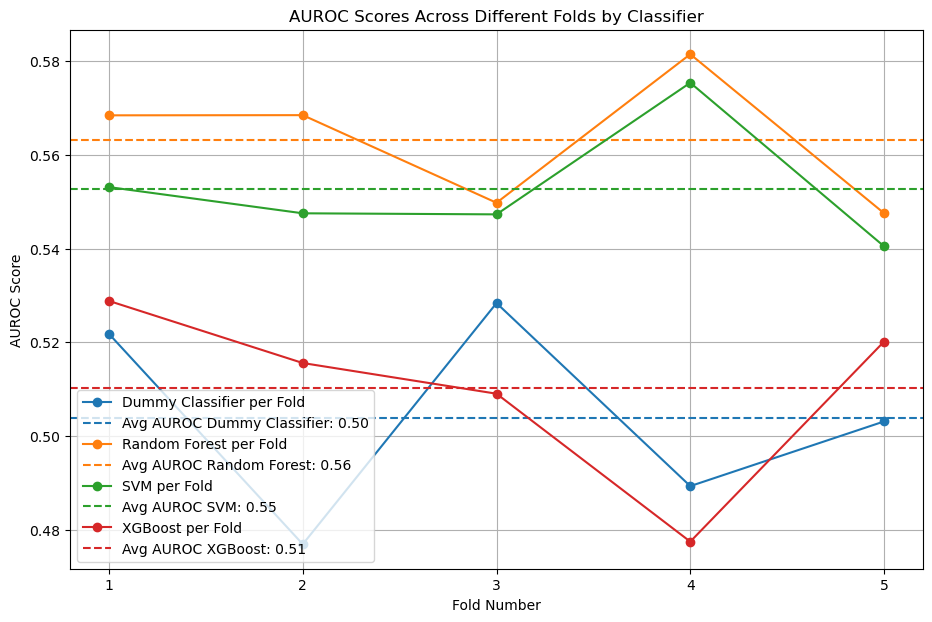

In [20]:
#ROC
# Preparing the data
X = finalDf[['wordCount_with_stopwords', 'syllableCount_with_stopwords', 'ease_of_reading',
    'wordCount_without_stopwords', 'syllableCount_without_stopwords', 'sentiment',
    'PP_CD', 'PP_NN', 'PP_JJ', 'PP_VBN', 'PP_VBP', 'PP_NNS', 'PP_VBD', 'PP_VBG',
    'PP_DT', 'PP_IN', 'PP_JJS', 'PP_MD', 'PP_VB', 'PP_RB', 'PP_VBZ', 'PP_RBS',
    'PP_JJR', 'PP_WRB', 'PP_RBR', 'PP_2_CD', 'PP_2_NN', 'PP_2_JJ', 'PP_2_VBN',
    'PP_2_VBP', 'PP_2_NNS', 'PP_2_VBD', 'PP_2_VBG', 'PP_2_DT', 'PP_2_IN',
    'PP_2_JJS', 'PP_2_MD', 'PP_2_VB', 'PP_2_RB', 'PP_2_VBZ', 'PP_2_RBS',
    'PP_2_JJR', 'PP_2_WRB', 'PP_2_RBR', 'PP_3_CD', 'PP_3_NN', 'PP_3_JJ',
    'PP_3_VBN', 'PP_3_VBP', 'PP_3_NNS', 'PP_3_VBD', 'PP_3_VBG', 'PP_3_DT',
    'PP_3_IN', 'PP_3_JJS', 'PP_3_MD', 'PP_3_VB', 'PP_3_RB', 'PP_3_VBZ',
    'PP_3_RBS', 'PP_3_JJR', 'PP_3_WRB', 'PP_3_RBR'
]]
y = finalDf['TUT']

# Identify majority and minority classes
majority_class = finalDf['TUT'].value_counts().idxmax()
minority_class = finalDf['TUT'].value_counts().idxmin()
print("Majority class", majority_class)
print("Minority class", minority_class)

# Separate majority and minority class samples
majority_indices = finalDf[finalDf['TUT'] == majority_class].index
minority_indices = finalDf[finalDf['TUT'] == minority_class].index

precision_scorer = make_scorer(precision_score)

plt.figure(figsize=(11, 7)) 

precision_dict = {}
recall_dict = {}

# List of classifiers
classifiers = {
    'Chance': DummyClassifier(strategy="stratified"),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(random_state=42, probability=True), 
    "XGBoost": xgb.XGBClassifier(random_state=42)
}
auroc_score_barplot = {name: [] for name in classifiers}

# Parameters for tuning classifiers
param_grid_RF = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200],
    }

param_grid_SVM = {
    'C': [0.1, 1, 10],
#     'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']
}
    

param_grid_XGB = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 20],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
}

param_grids = {
    'Random Forest': param_grid_RF,
    'SVM': param_grid_SVM,
    'XGBoost': param_grid_XGB
}

# Define the number of folds for cross-validation
n_splits = 5

# Define the GroupKFold object
gkf = GroupKFold(n_splits=n_splits)

# Loop through the classifiers
for name, clf in classifiers.items():
    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    weighted_f1_scores = []
    precision_scores = []
    recall_scores = []
    auroc_scores = []
    confusion_matrices = []
    prediction_rates = []

    # Perform cross-validation
    for train_index, test_index in gkf.split(X, y, groups=finalDf['Participant']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply PCA on the training data
        pca = PCA(n_components=0.95)
        X_train_pca = pca.fit_transform(X_train)
        X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

        
        # Perform oversampling on minority class
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

        
#         print(f"Before SMOTE: {Counter(y_train)}")
#         print(f"After SMOTE: {Counter(y_train_resampled)}")

        # Apply the transformation to the test data
        X_test_pca = pca.transform(X_test)
        X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

        
        # Perform hyperparamenter tuning and train classifiers on best parameters
        if name != "Chance":
            grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring=roc_auc_score, n_jobs=-1)
            grid.fit(X_train_resampled, y_train_resampled)
            best_clf = grid.best_estimator_
            best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test_pca_df)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1] 

        else:
            best_clf = clf.fit(X_train, y_train)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test)[:, 1] 


        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        auroc = roc_auc_score(y_test, y_pred_proba) 
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

        
        # Append evaluation metrics to lists
        accuracy_scores.append(accuracy)
        weighted_f1_scores.append(weighted_f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auroc_scores.append(auroc)
        confusion_matrices.append(confusion_matrix)
        prediction_rates.append(prediction_rate)

        #barplot for AUROC
        auroc_score_barplot[name].append(auroc)
        
    
    # Calculate average evaluation metrics across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_weighted_f1 = np.mean(weighted_f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_auroc = np.mean(auroc_scores)
    avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
    avg_prediction_rate = np.mean(prediction_rates)

    
    # Output the average evaluation metrics for each classifier
    print(f"{name} Results:")
    print(f"Avg Accuracy: {avg_accuracy:.2f}")
    print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
    print(f"Avg Precision_1: {avg_precision:.2f}")
    print(f"Avg Recall_1: {avg_recall:.2f}")
    print(f"Avg AUROC: {avg_auroc:.2f}")
    print("Avg Confusion Matrix:")
    print(avg_confusion_matrix)
    print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

    # Store the average precision and recall for each classifier in a dictionary
    precision_dict[name] = avg_precision
    recall_dict[name] = avg_recall
    

# List of colors for each classifier
colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

# Plot bar charts for precision and recall
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Precision plot
ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
ax[0].set_title('Precision Scores by Classifier')
ax[0].set_xlabel('Classifier')
ax[0].set_ylabel('Precision Score')
ax[0].set_ylim([0, 1])

# Recall plot
ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
ax[1].set_title('Recall Scores by Classifier')
ax[1].set_xlabel('Classifier')
ax[1].set_ylabel('Recall Score')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()


# Plot bar chart for AUROC
fig, ax = plt.subplots(figsize=(11, 7))
bar_width = 0.15  
gap_width = 0.05 

bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

for idx, name in enumerate(classifiers):
    scores = auroc_score_barplot[name]
    avg_score = np.mean(scores)
    for fold_idx, score in enumerate(scores):
        bar_pos = bar_positions[idx] + (fold_idx * bar_width)
        ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
               color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
    ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
ax.set_xlabel('Classifiers')
ax.set_ylabel('AUROC Score')
ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers')

ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
ax.set_xticklabels(classifiers.keys())

ax.legend(loc='lower right')

plt.tight_layout()
plt.show()
